In [1]:
#from model_phantom_noise import *
from model_phantom_DB import *
from linares_plot import * 
import itertools


%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


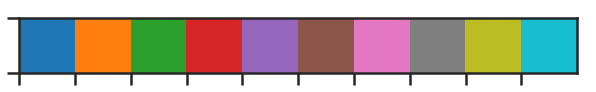

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(250/2) ;
nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+50) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, nsteps], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    #plt.gca().set_xticks([])
    plt.gca().set_xticks([0,an[4].shape[1]/2, an[4].shape[1]])
    plt.gca().set_xticklabels(['0', str(an[4].shape[1]), str(an[4].shape[1]*2)], rotation=0)
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    plt.gca().set_xlabel('time (ms)');

## Examples

In [116]:
fee=0.98
fei=0.78
fie=1.15
fii=0.89


on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)


plt.show()


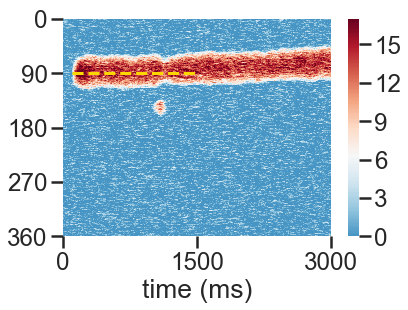

In [117]:
on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=57, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=2., phantom_onset=50000, phnatom_duration=100)

hemap(on)


In [118]:
fee=0.98
fei=0.78
fie=1.15
fii=0.89

In [154]:
noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations
times = np.arange(0,nsteps*dt,dt)
noisepopE = []
noisepopI = []
for i_noise in range(N):
    nE=noisemodel(times)
    nI=noisemodel(times)
    noisepopE.append(nE)
    noisepopI.append(nI)
###

noisepopE=np.squeeze(noisepopE)
noisepopI=np.squeeze(noisepopI)

In [260]:
times

array([   0,    2,    4, ..., 2994, 2996, 2998])

In [155]:
np.shape(noisepopE)

(512, 750)

In [159]:
noiseE = 10.*noisepopE[:,0]
np.shape(noiseE)

(512,)

2.61

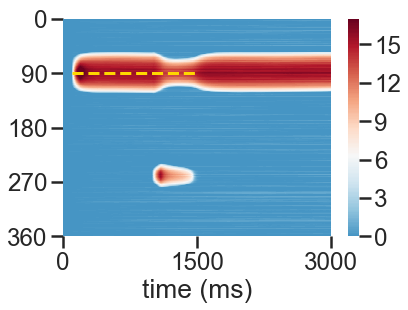

In [55]:
fee=1.
fei=1.
fie=1.
fii=1.

on2= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=750,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]


In [ ]:
fee=1.
fei=1.
fie=1.
fii=1.

##high kappa --> less noise

errors_off=[]

for i in range(2):
    on2= model(totalTime= 6000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fii,
               GEI=0.13*fei,
               GIE=0.042*fie, 
               sigE=7., sigI=5., k_noise=0.35,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

    hemap(on2)
    plt.show()
    errors_off.append(on2[1])


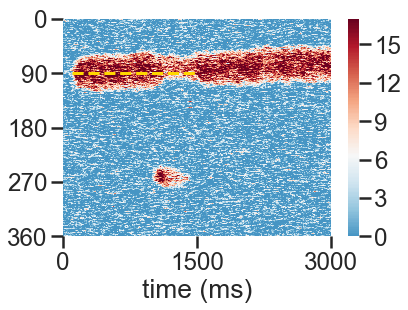

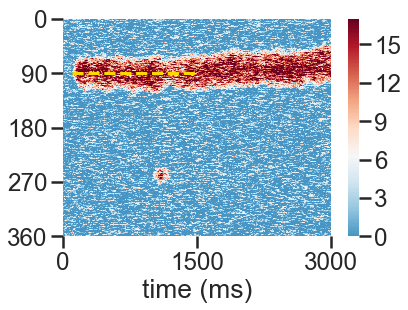

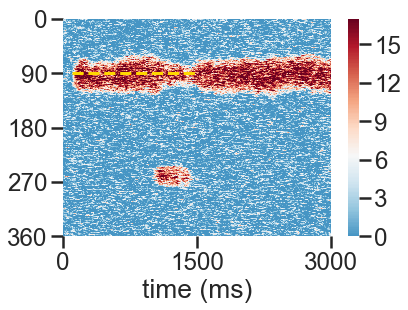

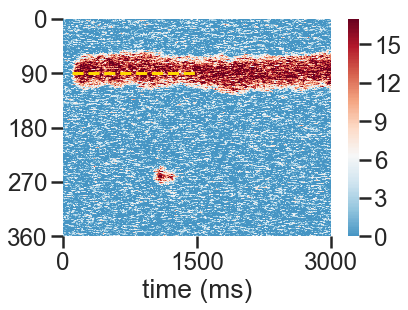

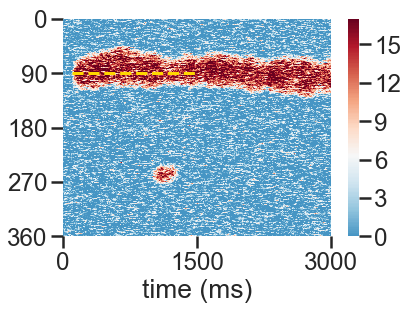

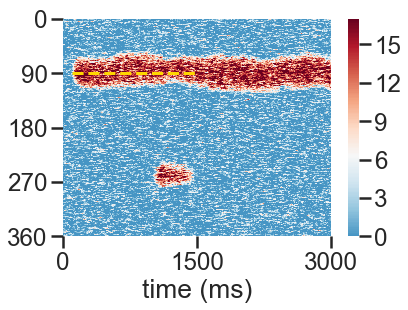

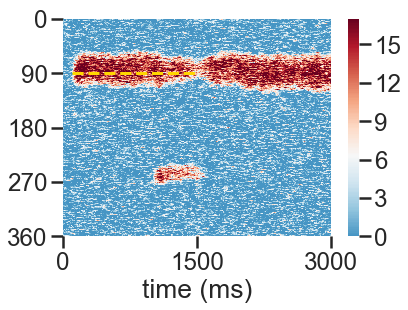

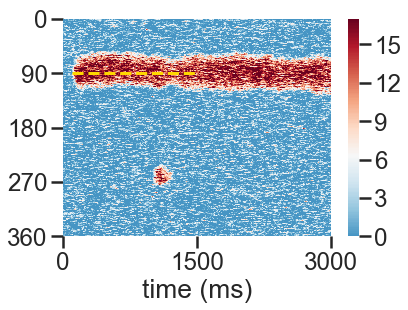

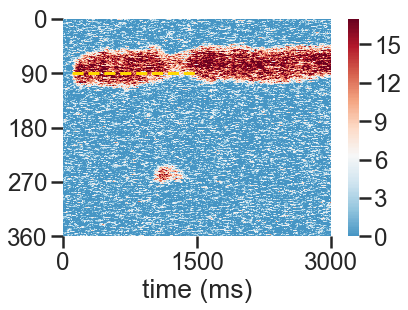

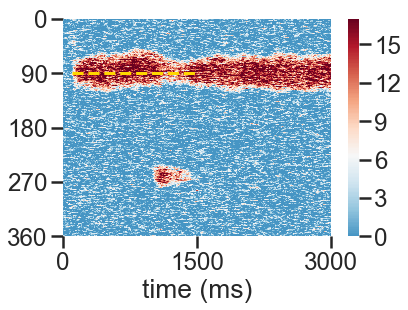

In [131]:
fee=1.
fei=1.
fie=1.
fii=1.

##high kappa --> less noise
errors_on=[]

for i in range(100):
    on3= model(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fii,
               GEI=0.13*fei,
               GIE=0.042*fie, 
               sigE=7., sigI=5., k_noise=0.35,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

    hemap(on3)
    plt.show()
    errors_on.append(on3[1])


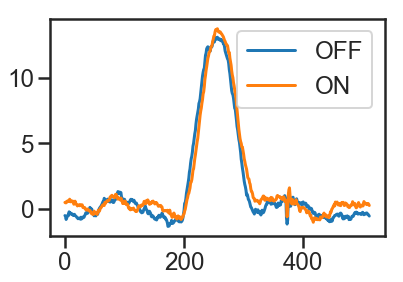

In [127]:
N=512
PA_off = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on3[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.legend()

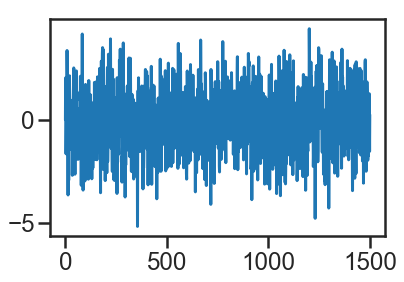

In [23]:
import sdepy as sd
# k_noise=0.001
# noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations
# times = np.arange(0,1500*2,2)
# nE=noisemodel(times)
# plt.plot(nE)

##(higher the kappa, less noise)
k_noise=0.35
noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations (higher kappa, more fluctuations) 
times = np.arange(0,1500*2,2)
nE=noisemodel(times)
plt.plot(nE)



(0, 200)

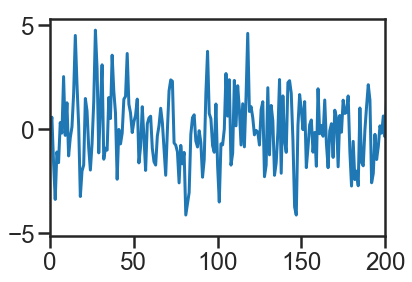

In [33]:

def ornstein_uhlenbeck(t_final, delta_t , theta ):
    sigma = 1.
    # The time array of the trajectory
    time = np.arange(0, t_final, delta_t)
    # Initialise the array y
    y = np.zeros(time.size)
    # Generate a Wiener process
    dw = np.random.normal(loc = 0, scale = np.sqrt(delta_t), size = time.size)
    # Integrate the process
    for i in range(1,time.size):
        y[i] = y[i-1] - theta*y[i-1]*delta_t + sigma*dw[i]

    return(y)



plt.plot(ornstein_uhlenbeck(t_final=3000, delta_t=2 , theta = 0.35))
plt.xlim(0, 200)

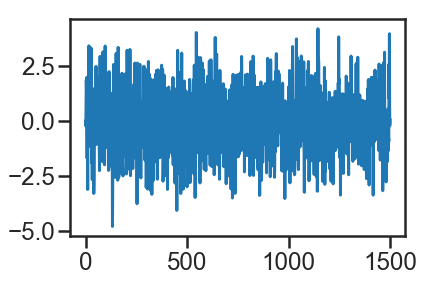

In [18]:
import sdepy as sd
k_noise=0.35
noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations (higher kappa, more fluctuations) 
times = np.arange(0,1500*2,2)
nE=noisemodel(times)
plt.plot(nE)


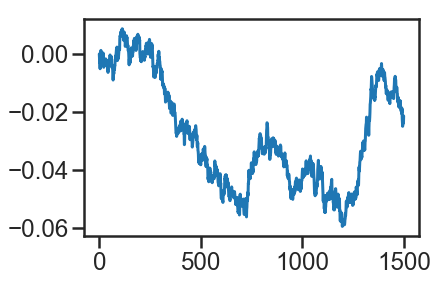

In [54]:
plt.plot(Uhlenbeck(3000, 2, kappa=750, mu=1, sigma=1) )

In [56]:
from model_phantom_noise import *

-4.33

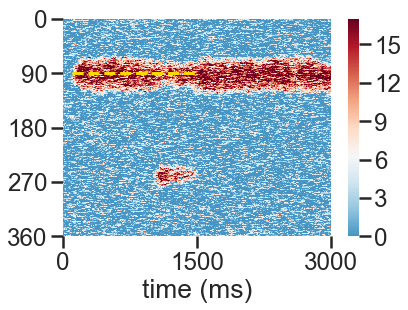

In [59]:
fee=1.
fei=1.
fie=1.
fii=1.

on2= model2(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.3,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]

11.78

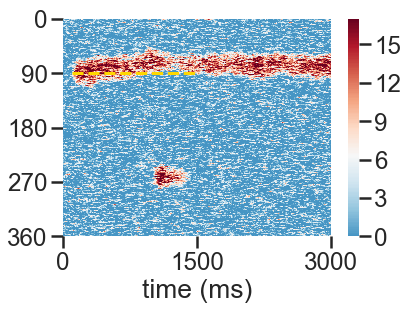

In [71]:
fee=1.
fei=1.
fie=1.
fii=1.

on2= model2(totalTime= 3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.3,            
           kappa_E=45, 
           kappa_I=0.8, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]

65.09

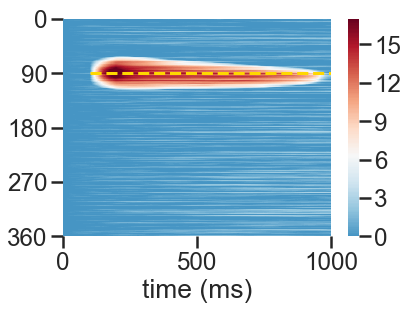

In [301]:
fee=1.
fei=1.
fie=1.
fii=1.

on2= model(totalTime= 1000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=1., sigI=0.5, k_noise=1,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]


In [223]:
dt = 2 # Time step.
T = 3000  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

In [279]:
def Uhlenbeck(totaltime, dt, kappa, mu=1, sigma=1):
    tau=totaltime*kappa ##1 means very slow and 0.1 fast buildup
    n = int(T / dt) 
    t = np.linspace(0., T, n)  # Vector of times.
    sigma_bis = sigma * np.sqrt(2. / tau)
    sqrtdt = np.sqrt(dt)
    x = np.zeros(n)
    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
            sigma_bis * sqrtdt * np.random.randn()
    return x



noise_nE = Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=3000, dt=2, kappa=0.8, mu=7, sigma=1)  for n in range(512))
noise_nI = Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=3000, dt=2, kappa=0.8, mu=7, sigma=1)  for n in range(512))

In [280]:
Uhlenbeck(totaltime=3000, dt=2, kappa=0.8)

array([ 0.        , -0.00375427,  0.02384467, ..., -1.34253946,
       -1.38511572, -1.45291527])

In [296]:
 from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.signal
from scipy.optimize import curve_fit 
import pandas as pd
import sdepy as sd

## Fucntions to use


def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE)
    
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded
    #Mat.append(  [angle(R), abs(angle(R)) , degrees(abs(angle(R)))]  )
    #return round( np.degrees(abs(np.angle(R))), 2)


def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)


def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 


def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)
        interferences.append(Err_interference)
    
    return interferences


def viz_polymonial(X, y, poly_reg, pol_reg):
    plt.figure()
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fit Bump')
    plt.xlabel('Neuron')
    plt.ylabel('rate')
    plt.show(block=False)
    return


def err_deg(a1,ref):
    ### Calculate the error ref-a1 in an efficient way in the circular space
    ### it uses complex numbers!
    ### Input in degrees (0-360)
    a1=np.radians(a1)
    ref=np.radians(ref)
    err = np.angle(np.exp(1j*ref)/np.exp(1j*(a1) ), deg=True) 
    err=round(err, 2)
    return err




def closest(lst, K):       
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 

def model_I0E(center_angle, size_windows, N=512):
    inf, sup = np.radians(center_angle) - np.radians(size_windows/2), np.radians(center_angle) + np.radians(size_windows/2)
    new_I0E=[]
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    for i in theta:
        if i < closest(theta, inf):
            new_I0E.append(0)
        elif i>= closest(theta, inf) and i <=closest(theta, sup):
            new_I0E.append(1)
        else:
            new_I0E.append(0)
    
    return np.reshape(np.array(new_I0E), (N,1))



def Uhlenbeck(totaltime, dt, kappa, mu=1, sigma=1):
    tau=totaltime*kappa ##1 means very slow and 0.1 fast buildup
    n = int(T / dt) 
    t = np.linspace(0., T, n)  # Vector of times.
    sigma_bis = sigma * np.sqrt(2. / tau)
    sqrtdt = np.sqrt(dt)
    x = np.zeros(n)
    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
            sigma_bis * sqrtdt * np.random.randn()
    return x





def model(totalTime, targ_onset_1, targ_onset_2, presentation_period, angle_target_i, angle_separation, tauE=9, 
          tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.5, sigI=1.6, k_noise=0.8,
          kappa_E=100, kappa_I=1.75, kappa_stim=100, N=512, plot_connectivity=False, plot_rate=False, 
          plot_hm=True , plot_fit=True, stim_strengthE=1., stim_strengthI=1., 
          phantom_st = 0.2, phantom_onset=500, phnatom_duration=200):
    #
    st_sim =time.time()
    dt=2
    nsteps=int(floor(totalTime/dt));
    origin = np.radians(angle_target_i)
    rE=zeros((N,1));
    rI=zeros((N,1));
    #Connectivities
    v_E=zeros((N));
    v_I=zeros((N));
    WE=zeros((N,N));
    WI=zeros((N,N));
    separation =  np.radians(angle_separation)
    angle_target=angle_target_i
    angle_distractor=angle_target_i-angle_separation
    if n_stims==1:
        separation=0


    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
    for i in range(0, N):
        v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
        v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) for f in range(0, len(theta))]
        ###    
        vE_NEW=roll(v_E_new,i)
        vI_NEW=roll(v_I_new,i) #to roll
        ###    
        WE[:,i]=vE_NEW
        WI[:,i]=vI_NEW
    #
    # Plot of the connectivity profile
    if plot_connectivity ==True:
        plt.figure()
        plt.plot(WE[250, :], label='E')
        plt.plot(WI[250, :], label = 'I')
        plt.ylim(0,6)
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.show(block=False)
    ##
    # Stims
    if n_stims==2:
        stimulus1=zeros((N))
        stimulus2=zeros((N))
        for i in range(0, N):
            stimulus1[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
            stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin + separation)) / (2*pi*scipy.special.i0(kappa_stim))
        #stimulus= (stimulus1 + stimulus2);
        #stimulus=reshape(stimulus, (N,1))
        stimulus_1=reshape(stimulus1, (N,1))
        stimulus_2=reshape(stimulus2, (N,1))
    elif n_stims==1:
        stimulus2=zeros((N));
        for i in range(0, N):
            stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
        stimulus=stimulus2
        stimulus=reshape(stimulus, (N,1))
    ###
    ###
    stimon1 = floor(targ_onset_1/dt);
    stimoff1 = floor(targ_onset_1/dt) + floor(presentation_period/dt) ;
    stimon2 = floor(targ_onset_2/dt);
    stimoff2 = floor(targ_onset_2/dt) + floor(presentation_period/dt) ;
    #Simulation
    #generation of the noise and the connectivity between inhib and exitatory
    RE=zeros((N,nsteps));
    RI=zeros((N,nsteps));
    f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)

    background_s= I0E* ones((N,1))
    background_silent = -8. * ones((N,1))
    ##print(1)
    background_on = (I0E+phantom_st) * ones((N,1))
    background = background_s 
    ##noise
    noisepopE = np.array( Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=totalTime, dt=dt, kappa=k_noise)  for n in range(N)) )
    noisepopI = np.array( Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=totalTime, dt=dt, kappa=k_noise)  for n in range(N)) )
    ### diferential equations
    for i in range(0, nsteps):
        noiseE = np.reshape(sigE*noisepopE[:,i], (N,1))
        noiseI = np.reshape(sigI*noisepopI[:,i], (N,1))
        #noiseE = sigE*random.randn(N,1);
        #noiseI = sigI*random.randn(N,1);
        #differential equations for connectivity
        ## ## everything defining the excitatory current must end in the excitatory (GEE, GIE) and viceversa
        IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background; 
        II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
        # phantom condition
        if i< stimon1:
            IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background_silent;

        if i > float(phantom_onset/dt) and i < float(phantom_onset/dt) + float(phnatom_duration/dt) :
            background= background_on
        else:
            background= background_s
        ## stim condition
        if i>stimon1 and i<stimoff1:
            IE=IE+stim_strengthE*stimulus_1 + (background_on-background_s);
            II=II+stim_strengthI*stimulus_1;
        if i>stimon2 and i<stimoff2:
            IE=IE+stim_strengthE*stimulus_2 + (background_on-background_s);
            II=II+stim_strengthI*stimulus_2;
        #
        #rates of exit and inhib
        rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
        rI = rI + (f(II) - rI + noiseI)*dt/tauI;
        rEr=reshape(rE, N)
        rIr=reshape(rI, N)
        #drawnow
        RE[:,i] = rEr;
        RI[:,i] = rIr;
    #
    ## metrics
    if n_stims==2:
        interference = Interference_effects( [decode_rE(stimulus1)], [decode_rE(rE)], [decode_rE(stimulus2)])[0]

    p_targ1 = int((N * np.degrees(origin))/360)
    p_targ2 = int((N * np.degrees(origin + separation))/360)
    #
    if plot_rate==True:
        #### plot dynamics
        fig = plt.figure()
        plt.title('Rate dynamics')
        plt.plot(RE[N-p_targ1, :], 'b', label='target1')
        plt.plot(RE[N-p_targ2, :], 'r', label='target2')
        plt.xlabel('time (ms)')
        plt.ylabel('rate (Hz)')
        plt.legend()
        plt.show(block=False)
    if plot_hm==True:
        #### plot heatmap
        RE_sorted=flipud(RE)
        sns.set_context("poster", font_scale=1.1)
        sns.set_style("ticks")
        plt.figure(figsize=(10,5))
        #sns.heatmap(RE_sorted, cmap='binary', vmax=8)
        sns.heatmap(RE_sorted, cmap='RdBu_r')
        #plt.title('BUMP activity') # remove title
        #plt.ylabel('Angle')
        plt.xlabel('time (s)')
        #plt.ylim(int(3*N/8), int(5*N/8))
        plt.plot([stimon1, nsteps], [p_targ1, p_targ1], '--k', linewidth=2) ## flipped, so it is p_target 
        plt.plot([stimon2, nsteps], [p_targ2, p_targ2], '--k', linewidth=2) ## flipped, so it is p_target 
        #plt.plot([stimon, nsteps], [p_targ1, p_targ1], '--r',) ## flipped, so it is p_target 
        plt.yticks([])
        plt.xticks([])
        plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])
        #plt.ylim( 3*N/8, 5*N/8)
        #plt.plot([stimon, stimon,], [0+20, N-20], 'k-', label='onset')
        #plt.plot([stimoff, stimoff,], [0+20, N-20], 'k--', label='offset')
        #plt.plot([stimon, stimon,], [0+20, N-20], 'k-', linewidth=0.5)
        #plt.plot([stimoff, stimoff,], [0+20, N-20], 'k-', linewidth=0.5)
        #plt.legend()
        plt.show(block=False)
    
    
    ## print time consumed
    end_sim =time.time()
    total_time= end_sim - st_sim 
    total_time = round(total_time, 1)
    #print('Simulation time: ' + str(total_time) + 's')
    ####
    decode = decode_rE(flipud(rE))
    err=err_deg(decode, angle_target_i)
    err_2 = err_deg(decode, (angle_target_i+angle_separation) )

    return(decode, err, err_2, rE, RE, total_time) #bias_b1, bias_b2)


###

In [276]:
np.array(noise_nE).shape

(512, 1500)

In [273]:
np.shape(noisepopE)

(512, 1500)

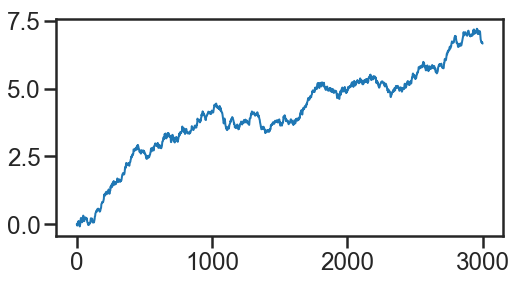

In [257]:



sigma = 1.  # Standard deviation.
mu = 7.  # Mean.
tau = 1500 #.05  # Time constant.
dt = 2#.001  # Time step.
T = 3000. # 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)
x = np.zeros(n)
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

In [259]:
x

array([ 0.        , -0.0298411 , -0.05113352, ...,  6.70556141,
        6.70484309,  6.6612534 ])

In [220]:
my_process(t=1, x=times)

{'dt': array([ 1.000e+00, -1.000e+00, -3.000e+00, ..., -2.993e+03, -2.995e+03,
        -2.997e+03]), 'dw': 1.0}

1.03

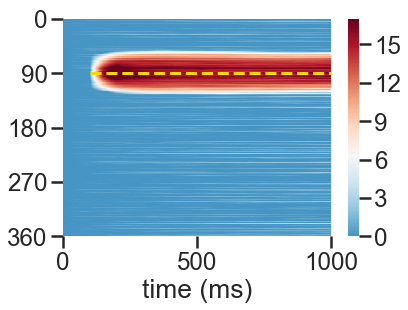

In [341]:
on2= model(totalTime= 1000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=100.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]


-0.74

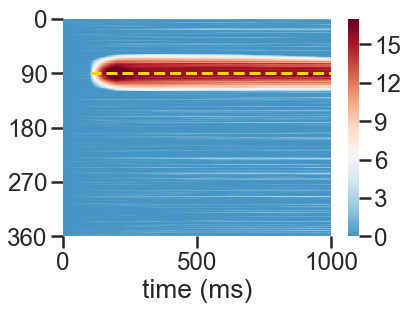

In [342]:
on2= model(totalTime= 1000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=100.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on2)
on2[1]


In [191]:
np.shape(noisepopE)

(512, 1500)

In [193]:
numcores=5

In [199]:
noisemodel

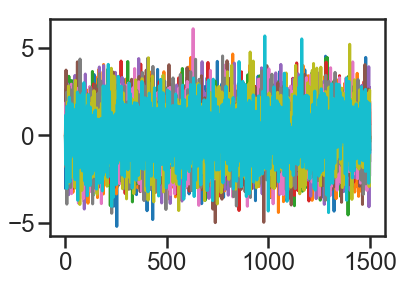

In [214]:
[plt.plot(noisepopE[x,:]) for x in range(10)];

In [ ]:
noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations
times = np.arange(0,nsteps*dt,dt)
noisepopE = []
noisepopI = []
for i_noise in range(N):
    nE=noisemodel(times)
    nI=noisemodel(times)
    noisepopE.append(nE)
    noisepopI.append(nI)
###
###
noisepopE=np.squeeze(noisepopE)
noisepopI=np.squeeze(noisepopI)
    #

In [284]:

totalTime=3000
targ_onset_1 = 100
targ_onset_2 =1000
presentation_period = 100 
angle_target_i = 90
angle_separation = 170
tauE=9
tauI=4
n_stims=2
I0E=0.1
I0I=0.5
GEE=0.022
GEI=0.019
GIE=0.01
GII=0.1
sigE=0.5
sigI=1.6
k_noise=0.5
kappa_E=100
kappa_I=1.75
kappa_stim=100
N=512
plot_connectivity=False
plot_rate=False
plot_hm=True
plot_fit=True
stim_strengthE=1.
stim_strengthI=1.
phantom_st = 0.2
phantom_onset=500
phnatom_duration=200
    #
st_sim =time.time()
dt=2
nsteps=int(floor(totalTime/dt));
origin = np.radians(angle_target_i)
rE=zeros((N,1));
rI=zeros((N,1));
#Connectivities
v_E=zeros((N));
v_I=zeros((N));
WE=zeros((N,N));
WI=zeros((N,N));
separation =  np.radians(angle_separation)
angle_target=angle_target_i
angle_distractor=angle_target_i-angle_separation
if n_stims==1:
    separation=0


theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
for i in range(0, N):
    v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
    v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) for f in range(0, len(theta))]
    ###    
    vE_NEW=roll(v_E_new,i)
    vI_NEW=roll(v_I_new,i) #to roll
    ###    
    WE[:,i]=vE_NEW
    WI[:,i]=vI_NEW
#
# Plot of the connectivity profile
if plot_connectivity ==True:
    plt.figure()
    plt.plot(WE[250, :], label='E')
    plt.plot(WI[250, :], label = 'I')
    plt.ylim(0,6)
    plt.gca().spines['right'].set_visible(False) #no right axis
    plt.gca().spines['top'].set_visible(False) #no  top axis
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.show(block=False)
##
# Stims
if n_stims==2:
    stimulus1=zeros((N))
    stimulus2=zeros((N))
    for i in range(0, N):
        stimulus1[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
        stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin + separation)) / (2*pi*scipy.special.i0(kappa_stim))
    #stimulus= (stimulus1 + stimulus2);
    #stimulus=reshape(stimulus, (N,1))
    stimulus_1=reshape(stimulus1, (N,1))
    stimulus_2=reshape(stimulus2, (N,1))
elif n_stims==1:
    stimulus2=zeros((N));
    for i in range(0, N):
        stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
    stimulus=stimulus2
    stimulus=reshape(stimulus, (N,1))
###
###
stimon1 = floor(targ_onset_1/dt);
stimoff1 = floor(targ_onset_1/dt) + floor(presentation_period/dt) ;
stimon2 = floor(targ_onset_2/dt);
stimoff2 = floor(targ_onset_2/dt) + floor(presentation_period/dt) ;
#Simulation
#generation of the noise and the connectivity between inhib and exitatory
RE=zeros((N,nsteps));
RI=zeros((N,nsteps));
f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)

background_s= I0E* ones((N,1))
background_silent = -8. * ones((N,1))
##print(1)
background_on = (I0E+phantom_st) * ones((N,1))
background = background_s 


In [293]:
noisepopE = np.array( Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=totalTime, dt=dt, kappa=k_noise)  for n in range(N)) )
noisepopI = np.array( Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=totalTime, dt=dt, kappa=k_noise)  for n in range(N)) )

In [306]:
##noise
#dt=2
k_noise=0.9
noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations
times = np.arange(0,nsteps*dt,dt)
noisepopE = []
noisepopI = []
for i_noise in range(N):
    nE=noisemodel(times)
    nI=noisemodel(times)
    noisepopE.append(nE)
    noisepopI.append(nI)
###

noisepopE=np.squeeze(noisepopE)
noisepopI=np.squeeze(noisepopI)

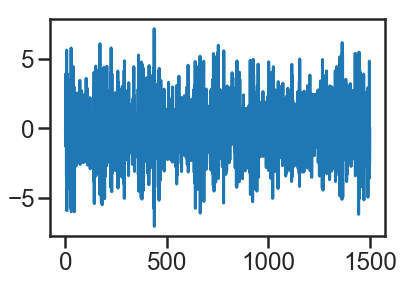

In [307]:
plt.plot(noisepopE[0,:])

In [330]:
noisepopEu = np.array( Parallel(n_jobs = numcores)(delayed(Uhlenbeck)(totaltime=totalTime, dt=dt, kappa=40.)  for n in range(N)) )


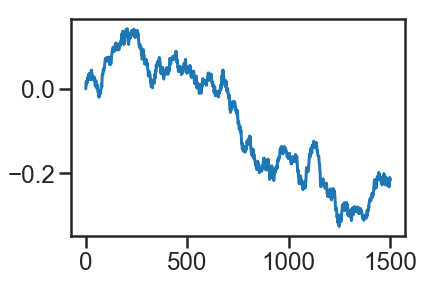

In [331]:
plt.plot(noisepopEu[0,:])

In [168]:
np.shape(noisepopE)

(512, 1500)

In [295]:
#
### diferential equations
for i in range(0, nsteps):
    #noiseE = sigE*noisepopE[:,i] #random.randn(N,1);
    #noiseI = sigI*noisepopI[:,i] #random.randn(N,1);
    noiseE = np.reshape(sigE*noisepopE[:,i], (N,1))
    noiseI = np.reshape(sigI*noisepopI[:,i], (N,1))
    
    #differential equations for connectivity
    ## ## everything defining the excitatory current must end in the excitatory (GEE, GIE) and viceversa
    IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background; 
    II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
    # phantom condition
    if i< stimon1:
        IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background_silent;

    if i > float(phantom_onset/dt) and i < float(phantom_onset/dt) + float(phnatom_duration/dt) :
        background= background_on
    else:
        background= background_s
    ## stim condition
    if i>stimon1 and i<stimoff1:
        IE=IE+stim_strengthE*stimulus_1 + (background_on-background_s);
        II=II+stim_strengthI*stimulus_1;
    if i>stimon2 and i<stimoff2:
        IE=IE+stim_strengthE*stimulus_2 + (background_on-background_s);
        II=II+stim_strengthI*stimulus_2;
    #
    #rates of exit and inhib
    rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
    rI = rI + (f(II) - rI + noiseI)*dt/tauI;
    rEr=reshape(rE, N)
    rIr=reshape(rI, N)
    #drawnow
    RE[:,i] = rEr;
    RI[:,i] = rIr;

In [177]:
np.shape(rE)

(512, 1)

In [178]:
np.shape(noiseE)

(512, 1)

In [183]:
from math import floor, exp, sqrt, pi
import cmath
import numpy
from numpy import e, cos, zeros, arange, roll, where, random, ones, mean, reshape, dot, array, flipud, pi, exp, dot, angle, degrees, shape, linspace
import matplotlib.pyplot as plt
from itertools import chain
import scipy
from scipy import special
import numpy as np 
import seaborn as sns
import time
from joblib import Parallel, delayed
import multiprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import scipy.signal
from scipy.optimize import curve_fit 
import pandas as pd
import sdepy as sd

## Fucntions to use


def decode_rE(rE, a_ini=0, a_fin=360, N=512):
    #Population vector for a given rE
    # return ( angle in radians, absolut angle in radians, abs angle in degrees )
    N=len(rE)
    Angles = np.linspace(a_ini, a_fin, N) 
    angles=np.radians(Angles)
    rE = np.reshape(rE, (1,N))
    R = numpy.sum(np.dot(rE,exp(1j*angles)))/numpy.sum(rE)
    
    angle_decoded = np.degrees(np.angle(R))
    if angle_decoded<0:
        angle_decoded = 360+angle_decoded
    
    return angle_decoded
    #Mat.append(  [angle(R), abs(angle(R)) , degrees(abs(angle(R)))]  )
    #return round( np.degrees(abs(np.angle(R))), 2)


def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)


def most_frequent(List): 
    dict = {} 
    count, itm = 0, '' 
    for item in reversed(List): 
        dict[item] = dict.get(item, 0) + 1
        if dict[item] >= count : 
            count, itm = dict[item], item 
    return(itm) 


def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(np.array(response)[i], np.array(reference)[i])<=circ_dist(np.array(target)[i], np.array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)
        interferences.append(Err_interference)
    
    return interferences


def viz_polymonial(X, y, poly_reg, pol_reg):
    plt.figure()
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Fit Bump')
    plt.xlabel('Neuron')
    plt.ylabel('rate')
    plt.show(block=False)
    return


def err_deg(a1,ref):
    ### Calculate the error ref-a1 in an efficient way in the circular space
    ### it uses complex numbers!
    ### Input in degrees (0-360)
    a1=np.radians(a1)
    ref=np.radians(ref)
    err = np.angle(np.exp(1j*ref)/np.exp(1j*(a1) ), deg=True) 
    err=round(err, 2)
    return err




def closest(lst, K):       
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))] 

def model_I0E(center_angle, size_windows, N=512):
    inf, sup = np.radians(center_angle) - np.radians(size_windows/2), np.radians(center_angle) + np.radians(size_windows/2)
    new_I0E=[]
    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)];
    for i in theta:
        if i < closest(theta, inf):
            new_I0E.append(0)
        elif i>= closest(theta, inf) and i <=closest(theta, sup):
            new_I0E.append(1)
        else:
            new_I0E.append(0)
    
    return np.reshape(np.array(new_I0E), (N,1))




def model(totalTime, targ_onset_1, targ_onset_2, presentation_period, angle_target_i, angle_separation, tauE=9, 
          tauI=4,  n_stims=2, I0E=0.1, I0I=0.5, GEE=0.022, GEI=0.019, GIE=0.01 , GII=0.1, sigE=0.5, sigI=1.6, k_noise=0.5,
          kappa_E=100, kappa_I=1.75, kappa_stim=100, N=512, plot_connectivity=False, plot_rate=False, 
          plot_hm=True , plot_fit=True, stim_strengthE=1., stim_strengthI=1., 
          phantom_st = 0.2, phantom_onset=500, phnatom_duration=200):
    #
    st_sim =time.time()
    dt=2
    nsteps=int(floor(totalTime/dt));
    origin = np.radians(angle_target_i)
    rE=zeros((N,1));
    rI=zeros((N,1));
    #Connectivities
    v_E=zeros((N));
    v_I=zeros((N));
    WE=zeros((N,N));
    WI=zeros((N,N));
    separation =  np.radians(angle_separation)
    angle_target=angle_target_i
    angle_distractor=angle_target_i-angle_separation
    if n_stims==1:
        separation=0


    theta = [float(range(0,N)[i])/N*2*pi for i in range(0,N)] 
    for i in range(0, N):
        v_E_new=[e**(kappa_E*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_E)) for f in range(0, len(theta))]    
        v_I_new=[e**(kappa_I*cos(theta[f]))/(2*pi*scipy.special.i0(kappa_I)) for f in range(0, len(theta))]
        ###    
        vE_NEW=roll(v_E_new,i)
        vI_NEW=roll(v_I_new,i) #to roll
        ###    
        WE[:,i]=vE_NEW
        WI[:,i]=vI_NEW
    #
    # Plot of the connectivity profile
    if plot_connectivity ==True:
        plt.figure()
        plt.plot(WE[250, :], label='E')
        plt.plot(WI[250, :], label = 'I')
        plt.ylim(0,6)
        plt.gca().spines['right'].set_visible(False) #no right axis
        plt.gca().spines['top'].set_visible(False) #no  top axis
        plt.gca().get_xaxis().tick_bottom()
        plt.gca().get_yaxis().tick_left()
        plt.show(block=False)
    ##
    # Stims
    if n_stims==2:
        stimulus1=zeros((N))
        stimulus2=zeros((N))
        for i in range(0, N):
            stimulus1[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
            stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin + separation)) / (2*pi*scipy.special.i0(kappa_stim))
        #stimulus= (stimulus1 + stimulus2);
        #stimulus=reshape(stimulus, (N,1))
        stimulus_1=reshape(stimulus1, (N,1))
        stimulus_2=reshape(stimulus2, (N,1))
    elif n_stims==1:
        stimulus2=zeros((N));
        for i in range(0, N):
            stimulus2[i]=e**(kappa_stim*cos(theta[i] + origin)) / (2*pi*scipy.special.i0(kappa_stim))
        stimulus=stimulus2
        stimulus=reshape(stimulus, (N,1))
    ###
    ###
    stimon1 = floor(targ_onset_1/dt);
    stimoff1 = floor(targ_onset_1/dt) + floor(presentation_period/dt) ;
    stimon2 = floor(targ_onset_2/dt);
    stimoff2 = floor(targ_onset_2/dt) + floor(presentation_period/dt) ;
    #Simulation
    #generation of the noise and the connectivity between inhib and exitatory
    RE=zeros((N,nsteps));
    RI=zeros((N,nsteps));
    f = lambda x : x*x*(x>0)*(x<1) + reshape(array([cmath.sqrt(4*x[i]-3) for i in range(0, len(x))]).real, (N,1)) * (x>=1)

    background_s= I0E* ones((N,1))
    background_silent = -8. * ones((N,1))
    ##print(1)
    background_on = (I0E+phantom_st) * ones((N,1))
    background = background_s 
    ##noise
    #dt=2
    #k_noise=0.5
    noisemodel=sd.ornstein_uhlenbeck_process(k=k_noise) # k=1/tau fluctuations
    times = np.arange(0,nsteps*dt,dt)
    noisepopE = []
    noisepopI = []
    for i_noise in range(N):
        nE=noisemodel(times)
        nI=noisemodel(times)
        noisepopE.append(nE)
        noisepopI.append(nI)
    ###
    ###
    noisepopE=np.squeeze(noisepopE)
    noisepopI=np.squeeze(noisepopI)
    #
    ### diferential equations
    for i in range(0, nsteps):
        noiseE = np.reshape(sigE*noisepopE[:,i], (N,1))
        noiseI = np.reshape(sigI*noisepopI[:,i], (N,1))
        #noiseE = sigE*random.randn(N,1);
        #noiseI = sigI*random.randn(N,1);
        #differential equations for connectivity
        ## ## everything defining the excitatory current must end in the excitatory (GEE, GIE) and viceversa
        IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background; 
        II= GEI*dot(WE,rE) +  (I0I-GII*mean(rI))*ones((N,1));
        # phantom condition
        if i< stimon1:
            IE= GEE*dot(WE,rE) - GIE*dot(WI,rI) + background_silent;

        if i > float(phantom_onset/dt) and i < float(phantom_onset/dt) + float(phnatom_duration/dt) :
            background= background_on
        else:
            background= background_s
        ## stim condition
        if i>stimon1 and i<stimoff1:
            IE=IE+stim_strengthE*stimulus_1 + (background_on-background_s);
            II=II+stim_strengthI*stimulus_1;
        if i>stimon2 and i<stimoff2:
            IE=IE+stim_strengthE*stimulus_2 + (background_on-background_s);
            II=II+stim_strengthI*stimulus_2;
        #
        #rates of exit and inhib
        rE = rE + (f(IE) - rE + noiseE)*dt/tauE;
        rI = rI + (f(II) - rI + noiseI)*dt/tauI;
        rEr=reshape(rE, N)
        rIr=reshape(rI, N)
        #drawnow
        RE[:,i] = rEr;
        RI[:,i] = rIr;
    #
    ## metrics
    if n_stims==2:
        interference = Interference_effects( [decode_rE(stimulus1)], [decode_rE(rE)], [decode_rE(stimulus2)])[0]

    p_targ1 = int((N * np.degrees(origin))/360)
    p_targ2 = int((N * np.degrees(origin + separation))/360)
    #
    if plot_rate==True:
        #### plot dynamics
        fig = plt.figure()
        plt.title('Rate dynamics')
        plt.plot(RE[N-p_targ1, :], 'b', label='target1')
        plt.plot(RE[N-p_targ2, :], 'r', label='target2')
        plt.xlabel('time (ms)')
        plt.ylabel('rate (Hz)')
        plt.legend()
        plt.show(block=False)
    if plot_hm==True:
        #### plot heatmap
        RE_sorted=flipud(RE)
        sns.set_context("poster", font_scale=1.1)
        sns.set_style("ticks")
        plt.figure(figsize=(10,5))
        #sns.heatmap(RE_sorted, cmap='binary', vmax=8)
        sns.heatmap(RE_sorted, cmap='RdBu_r')
        #plt.title('BUMP activity') # remove title
        #plt.ylabel('Angle')
        plt.xlabel('time (s)')
        #plt.ylim(int(3*N/8), int(5*N/8))
        plt.plot([stimon1, nsteps], [p_targ1, p_targ1], '--k', linewidth=2) ## flipped, so it is p_target 
        plt.plot([stimon2, nsteps], [p_targ2, p_targ2], '--k', linewidth=2) ## flipped, so it is p_target 
        #plt.plot([stimon, nsteps], [p_targ1, p_targ1], '--r',) ## flipped, so it is p_target 
        plt.yticks([])
        plt.xticks([])
        plt.yticks([N/8, 3*N/8, 5*N/8, 7*N/8 ] ,['45','135','225', '315'])
        #plt.ylim( 3*N/8, 5*N/8)
        #plt.plot([stimon, stimon,], [0+20, N-20], 'k-', label='onset')
        #plt.plot([stimoff, stimoff,], [0+20, N-20], 'k--', label='offset')
        #plt.plot([stimon, stimon,], [0+20, N-20], 'k-', linewidth=0.5)
        #plt.plot([stimoff, stimoff,], [0+20, N-20], 'k-', linewidth=0.5)
        #plt.legend()
        plt.show(block=False)
    
    
    ## print time consumed
    end_sim =time.time()
    total_time= end_sim - st_sim 
    total_time = round(total_time, 1)
    #print('Simulation time: ' + str(total_time) + 's')
    ####
    decode = decode_rE(flipud(rE))
    err=err_deg(decode, angle_target_i)
    err_2 = err_deg(decode, (angle_target_i+angle_separation) )

    return(decode, err, err_2, rE, RE, total_time) #bias_b1, bias_b2)


###

In [144]:
np.shape(np.squeeze(noisepopE) )

(10, 750)

4.2

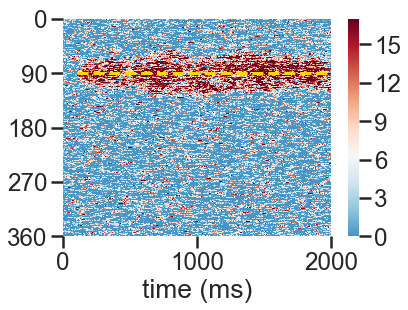

In [184]:
on3= model(totalTime= 2000, targ_onset_1=100, targ_onset_2=5000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=20., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on3)
on3[1]

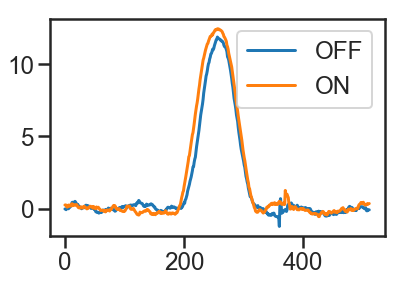

In [101]:
N=512
PA_off = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_off == max(PA_off)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_off_rolled = np.roll(PA_off, to_roll)


PA_on = pd.DataFrame(on3[3]).rolling(window=40, min_periods=1).mean().values
peak = np.where(PA_on == max(PA_on)[0])[0][0]
center = N/2
to_roll = -int(peak-center)
PA_on_rolled = np.roll(PA_on, to_roll)

plt.plot(PA_off_rolled, label='OFF')
plt.plot(PA_on_rolled, label='ON')
plt.legend()

In [412]:
on_rolled=[]

for n in range(10):
    on2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=1.2, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled.append(PA_on_rolled)
    

In [413]:
on_rolled_mean=np.mean(on_rolled, axis=0)

In [414]:
off_rolled=[]

for n in range(10):
    off2= model(totalTime= 1500, targ_onset_1=100, targ_onset_2=3000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled.append(PA_off_rolled)

In [415]:
off_rolled_mean=np.mean(off_rolled, axis=0)

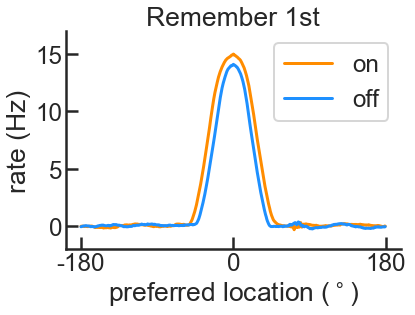

In [416]:
plt.plot(on_rolled_mean, color=c_on,  label='on' )
plt.plot(off_rolled_mean, color= c_off, label='off' )
plt.legend()
plt.title('Remember 1st')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticklabels(['-180', '0', '180'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
plt.ylim(-2,17);

## R2

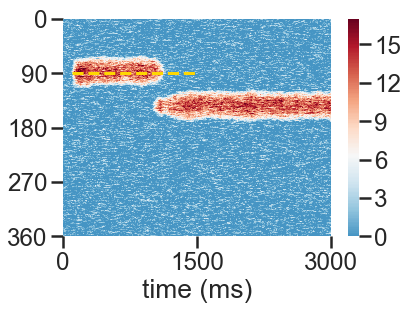

In [274]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)


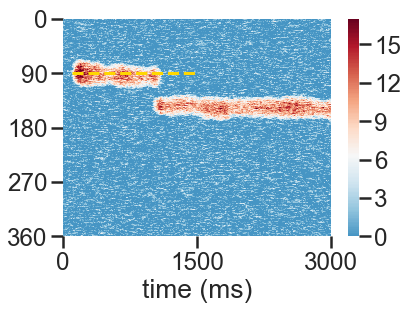

In [273]:

fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)

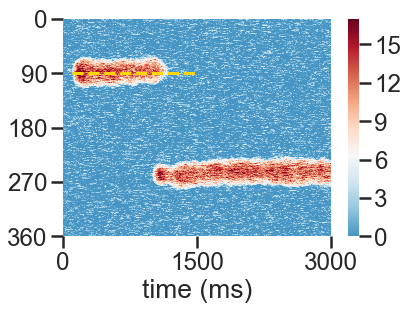

In [275]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on)

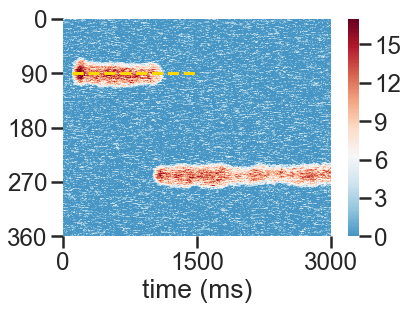

In [276]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on4= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on4)

In [64]:
on_rolled_2=[]

for n in range(10):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    on2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_on = pd.DataFrame(on2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_on == max(PA_on)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_on_rolled = np.roll(PA_on, to_roll)
    on_rolled_2.append(PA_on_rolled)

In [65]:
on_rolled2_mean=np.mean(on_rolled_2, axis=0)

In [66]:
off_rolled_2=[]

for n in range(10):
    fee=0.94
    fei=0.92
    fie=1.14
    fii=1.08
    off2= model(totalTime=3000, targ_onset_1=100, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=170, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    N=512
    PA_off = pd.DataFrame(off2[3]).rolling(window=40, min_periods=1).mean().values
    peak = np.where(PA_off == max(PA_off)[0])[0][0]
    center = N/2
    to_roll = -int(peak-center)
    PA_off_rolled = np.roll(PA_off, to_roll)
    off_rolled_2.append(PA_off_rolled)

In [67]:
off_rolled2_mean=np.mean(off_rolled_2, axis=0)

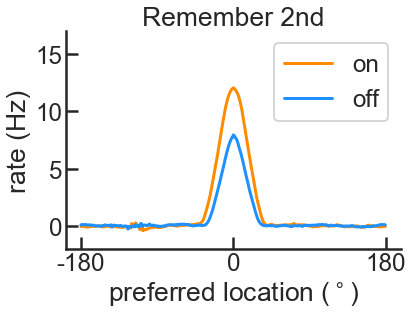

In [72]:
plt.plot(on_rolled2_mean, color=c_on,  label='on' )
plt.plot(off_rolled2_mean, color= c_off, label='off' )
plt.legend()
plt.title('Remember 2nd')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0,N/2, N])
plt.gca().set_xticklabels(['-180', '0', '180'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('preferred location ($^\circ$)');
#r'abs error ($^\circ$)'
plt.ylim(-2,17);

## Simulations

In [75]:
err1_on_f = pd.read_excel('err1_on_f7.xlsx')
err1_off_f = pd.read_excel('err1_off_f7.xlsx')

err1_on_c = pd.read_excel('err1_on_c6.xlsx')
err1_off_c = pd.read_excel('err1_off_c6.xlsx')



err2_on_f = pd.read_excel('err2_on_f6.xlsx')
err2_off_f = pd.read_excel('err2_off_f6.xlsx')

err2_on_c = pd.read_excel('err2_on_c6.xlsx')
err2_off_c = pd.read_excel('err2_off_c6.xlsx')

In [34]:
err1_on_f = pd.read_excel('err1_on_f30.xlsx')
err1_off_f = pd.read_excel('err1_off_f30.xlsx') ## 18, 19, 20, 21, 22 not working

err1_on_c = pd.read_excel('err1_on_c18.xlsx')
err1_off_c = pd.read_excel('err1_off_c18.xlsx')



err2_on_f = pd.read_excel('err2_on_f16.xlsx')
err2_off_f = pd.read_excel('err2_off_f16.xlsx')

err2_on_c = pd.read_excel('err2_on_c16.xlsx')
err2_off_c = pd.read_excel('err2_off_c16.xlsx')

In [35]:
# err1_on_f = pd.read_excel('err1_on_f24.xlsx')
# err1_off_f = pd.read_excel('err1_off_f24.xlsx') ## 18, 19, 20, 21, 22 not working

# err1_on_c = pd.read_excel('err1_on_c23.xlsx')
# err1_off_c = pd.read_excel('err1_off_c23.xlsx')



# err2_on_f = pd.read_excel('err2_on_f23.xlsx')
# err2_off_f = pd.read_excel('err2_off_f23.xlsx')

# err2_on_c = pd.read_excel('err2_on_c23.xlsx')
# err2_off_c = pd.read_excel('err2_off_c23.xlsx')

## R1 (remember first)

In [36]:
#outlier_lim=90
outlier_lim=45

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


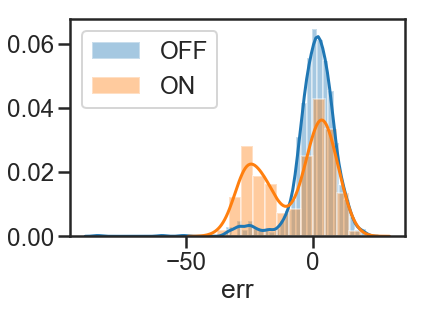

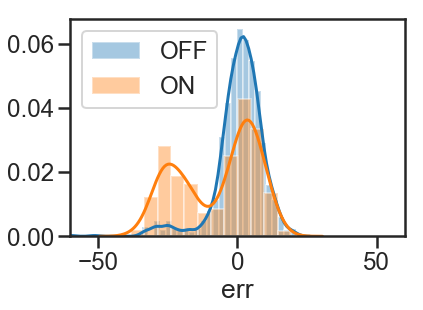

6.18248 12.35141


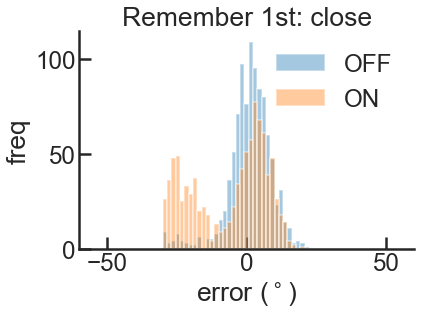

In [37]:
# err1_on_c = pd.read_excel('err1_on_c15.xlsx')
# err1_off_c = pd.read_excel('err1_off_c15.xlsx')

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.show()

sns.distplot(err1_off_c.err, label='OFF')
sns.distplot(err1_on_c.err, label='ON')
plt.legend()
plt.xlim(-60,60)
plt.show()
print(err1_off_c.abs_err.mean(), err1_on_c.abs_err.mean())


err1_off_c_o = err1_off_c.loc[err1_off_c['abs_err']< outlier_lim] #err1_off_c['abs_err'].mean() + 2*err1_off_c['abs_err'].std()]
err1_on_c_o = err1_on_c.loc[err1_on_c['abs_err']< outlier_lim] #err1_on_c['abs_err'].mean() + 2*err1_on_c['abs_err'].std()]

sns.distplot(err1_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err1_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-60,60)
plt.title('Remember 1st: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

In [38]:
# err1_on_f = pd.read_excel('err1_on_f29.xlsx')
# err1_off_f = pd.read_excel('err1_off_f29.xlsx') ## 18, 19, 20, 21, 22 not working



# sns.distplot(err1_off_f.err, label='OFF')
# sns.distplot(err1_on_f.err, label='ON')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


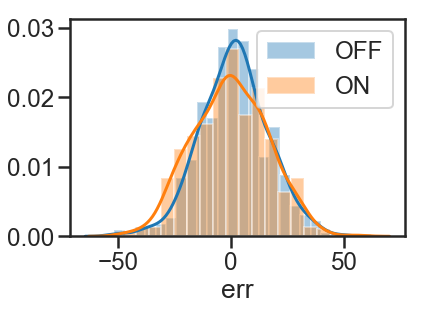

11.71642 13.2348


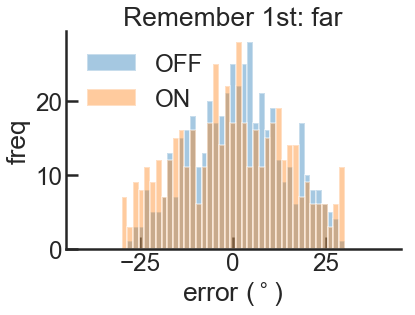

11.487665995975854 13.01523138832998


In [43]:
#err1_on_f = pd.concat( [pd.read_excel('err1_on_f13.xlsx'), pd.read_excel('err1_on_f12.xlsx')])
#err1_off_f = pd.concat( [pd.read_excel('err1_off_f13.xlsx'), pd.read_excel('err1_off_f12.xlsx')])

from scipy.stats import norm

# err1_on_f = pd.read_excel('err1_on_f15.xlsx')
# err1_off_f = pd.read_excel('err1_off_f15.xlsx')

sns.distplot(err1_off_f.err, label='OFF')
sns.distplot(err1_on_f.err, label='ON')
plt.legend()
plt.show()
print(err1_off_f.abs_err.mean(), err1_on_f.abs_err.mean())

err1_off_f_o = err1_off_f.loc[ err1_off_f['abs_err']< outlier_lim] #err1_off_f['abs_err'].mean() + 2*err1_off_f['abs_err'].std()]
err1_on_f_o = err1_on_f.loc[err1_on_f['abs_err']< outlier_lim ] #err1_on_f['abs_err'].mean() + 2*err1_on_f['abs_err'].std()]

sns.distplot(err1_off_f_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40) )
sns.distplot(err1_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40)  ) #, fit=norm, fit_kws={"color":"orange"}

plt.legend( frameon=False)
plt.xlim(-45,45)
plt.title('Remember 1st: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
#plt.ylim(-0.01, 0.08)
plt.show()

print(err1_off_f_o.abs_err.mean(), err1_on_f_o.abs_err.mean())


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


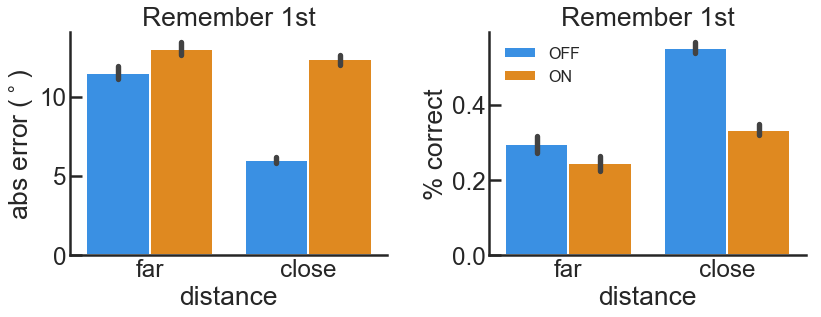

In [40]:
first = pd.concat([err1_on_c_o, err1_off_c_o,err1_on_f_o, err1_off_f_o ])
first['performance']=first['abs_err']<5

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 1st')
#ax1.set_ylim(2,6)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=68, data=first, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
#ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 1st')
#ax2.set_ylim(0.4, 1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

## R2

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


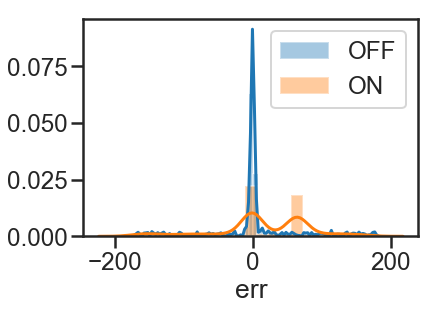

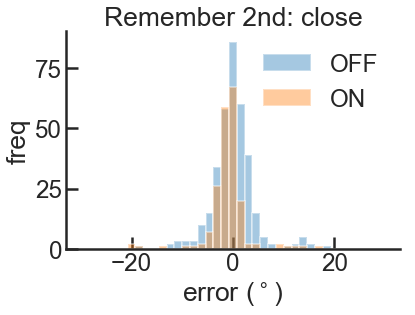

2.7246974063400575 2.184263959390863


In [24]:
outlier_lim=20

sns.distplot(err2_off_c.err, label='OFF')
sns.distplot(err2_on_c.err, label='ON')
plt.legend()
#plt.xlim(-30,30)
plt.show()
err2_on_c_o = err2_on_c.loc[err2_on_c['abs_err']< outlier_lim] # err2_on_c['abs_err'].mean()+ 2*err2_on_c['abs_err'].std()]
err2_off_c_o = err2_off_c.loc[err2_off_c['abs_err']< outlier_lim ]# err2_off_c['abs_err'].mean() + 2*err2_off_c['abs_err'].std()]

sns.distplot(err2_off_c_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err2_on_c_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
#plt.xlim(-30,30)
plt.title('Remember 2nd: close')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()


#print(err2_off_c.abs_err.mean(), err2_on_c.abs_err.mean())

print(err2_off_c_o.abs_err.mean(), err2_on_c_o.abs_err.mean())


##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


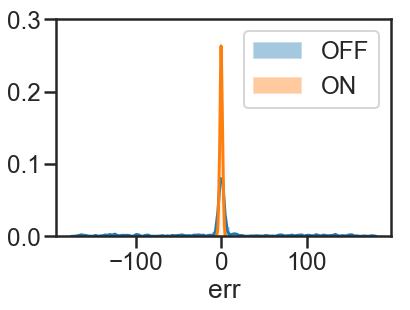

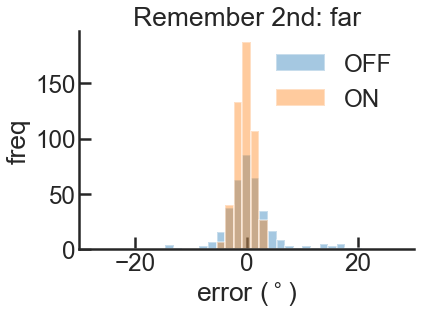

2.8007407407407405 1.23058


In [23]:
sns.distplot(err2_off_f.err, label='OFF')
sns.distplot(err2_on_f.err, label='ON')
plt.legend()
plt.show()

outlier_lim=20


err2_on_f_o = err2_on_f.loc[err2_on_f['abs_err']< outlier_lim]
err2_off_f_o = err2_off_f.loc[err2_off_f['abs_err']<outlier_lim]

sns.distplot(err2_off_f_o.err, label='OFF', kde=False,  bins=np.linspace(-30,30,40))
sns.distplot(err2_on_f_o.err, label='ON', kde=False,  bins=np.linspace(-30,30,40))
plt.legend( frameon=False)
plt.xlim(-30,30)
plt.title('Remember 2nd: far')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('error ($^\circ$)');
plt.show()

print(err2_off_f_o.abs_err.mean(), err2_on_f_o.abs_err.mean())
##################################################################


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


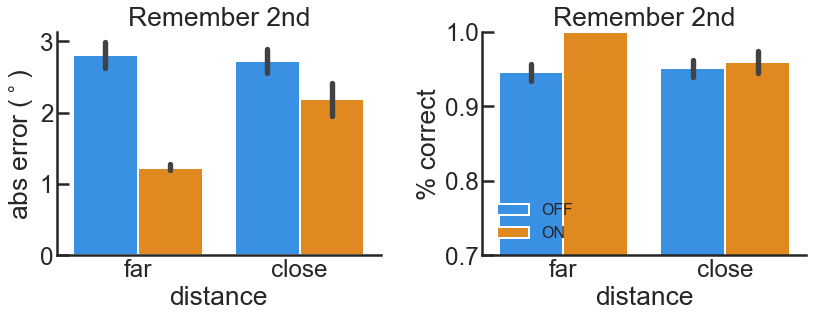

In [25]:
second = pd.concat([err2_on_c_o, err2_off_c_o,err2_on_f_o, err2_off_f_o ])
second['performance']=second['abs_err']<10

f = plt.figure(figsize=(12,5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

g = sns.barplot(x='distance', y='abs_err', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax1)
#plt.ylabel(r'% correct)')
g.legend_.remove()
ax1.set_ylabel(r'abs error ($^\circ$)')
ax1.set_title('Remember 2nd')
#ax1.set_ylim(2,9)
ax1.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax1.spines['top'].set_visible(False)                                                                                  # remove top spines
ax1.get_xaxis().tick_bottom()                                                                                         
ax1.get_yaxis().tick_left()
ax1.tick_params(direction='in') #direction
#adjust_spines(ax1, ['left', 'bottom'])



g = sns.barplot(x='distance', y='performance', hue='stimulation', order=['far', 'close'], hue_order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=second, ax=ax2)
g.legend_.remove()
ax2.set_ylabel(r'% correct')
ax1.set_ylabel(r'abs error ($^\circ$)')
ax2.set_title('Remember 2nd')
ax2.set_ylim(0.7, 1)
ax2.spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
ax2.spines['top'].set_visible(False)                                                                                  # remove top spines
ax2.get_xaxis().tick_bottom()                                                                                         
ax2.get_yaxis().tick_left()
ax2.tick_params(direction='in') #direction
#adjust_spines(ax2, ['left', 'bottom'])
ax2.legend(loc='best', frameon=False, prop={'size': 16});

plt.tight_layout()
plt.show()

## Phantom? 

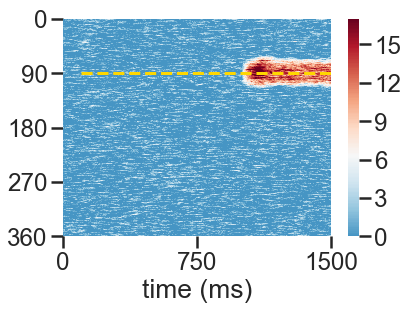

In [94]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=1500, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phnatom_duration=200)

hemap(on)

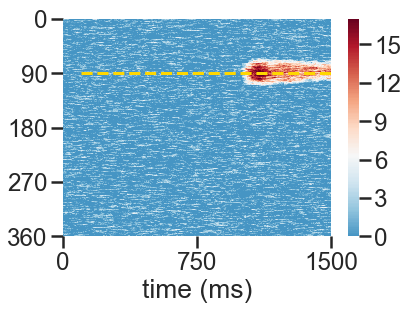

In [92]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

on= model(totalTime=1500, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
           angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2., I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=7., sigI=5.,            
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=100, phnatom_duration=200)

hemap(on)

### Simulations phantom

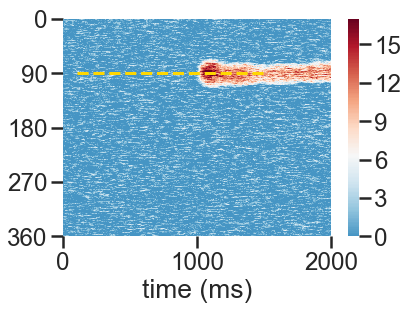

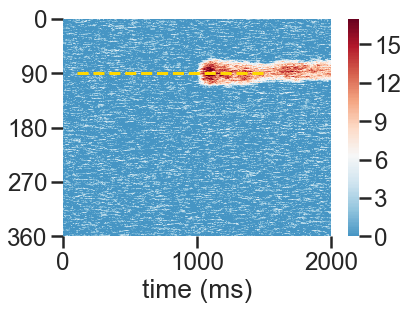

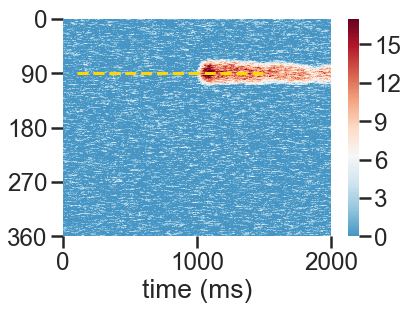

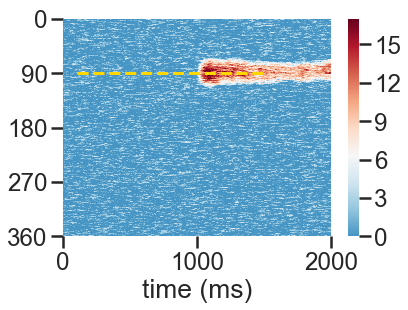

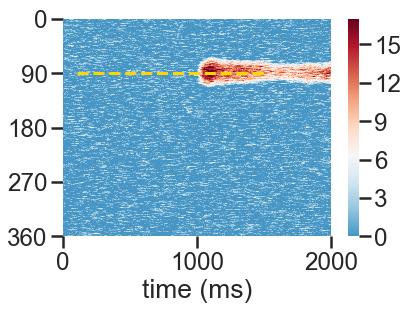

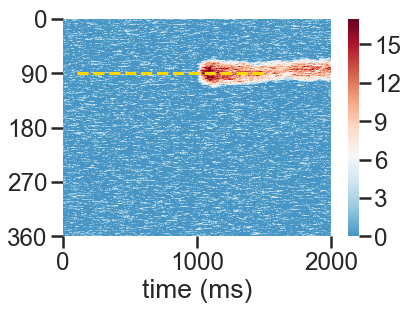

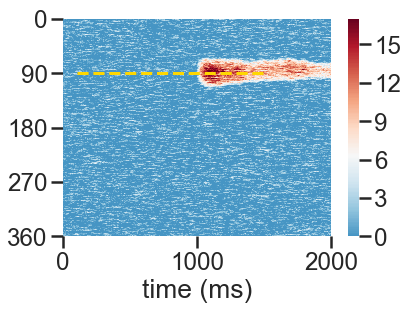

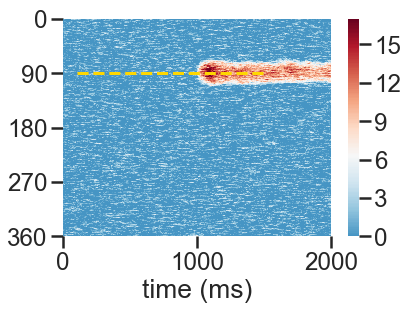

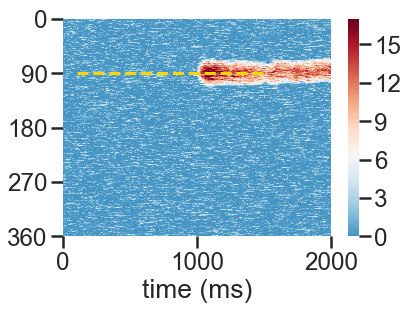

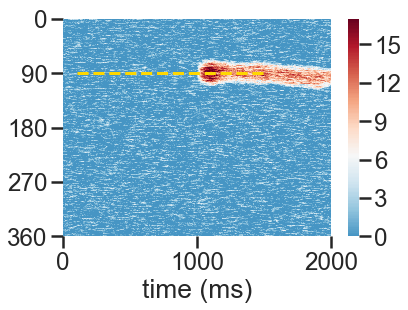

In [95]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=10
firing_phant_off=[]
RE_off_stim=[]
RE_off=[]
firing_all_off=[]

for g in range(n_sim_ph):
    on2= model(totalTime=2000, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=-2, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phnatom_duration=200)
    hemap(on2)
    plt.show()
    mean_firing=on2[4][:, 50:400].mean()
    RE_off.append(on2[4][:, 50:500])
    RE_off_stim.append(on2[4][:, 500:])
    firing_phant_off.append(mean_firing)
    firing_all_off.append( on2[4].mean(axis=0) )

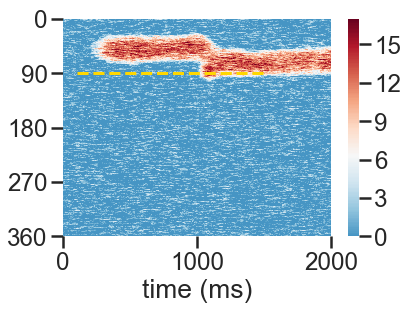

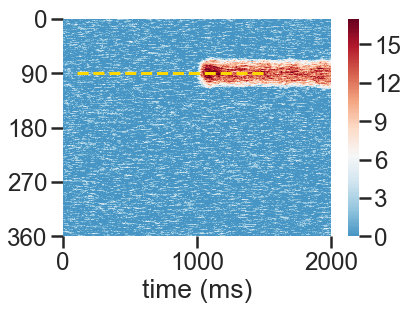

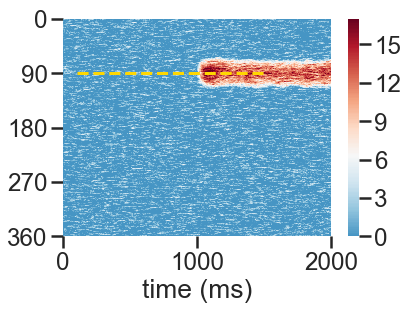

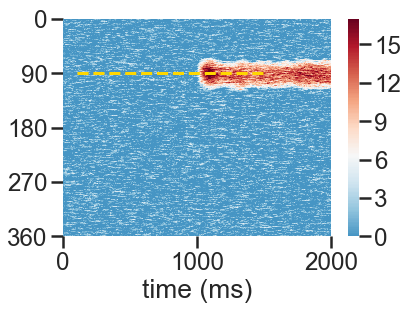

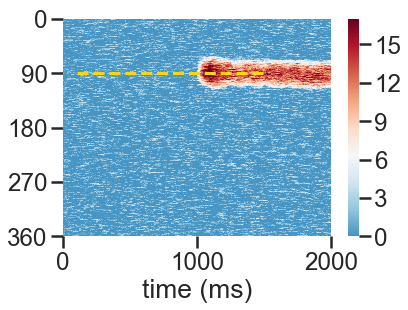

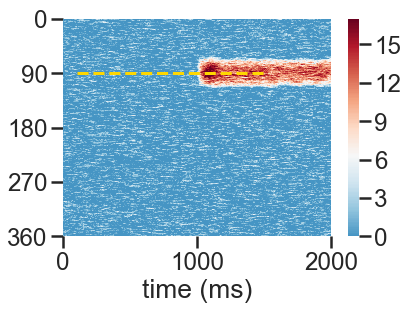

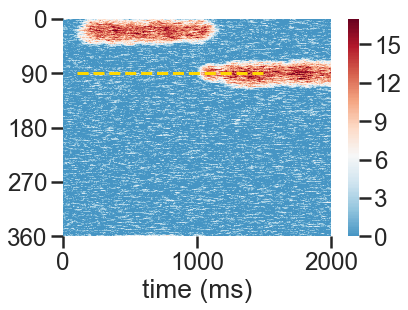

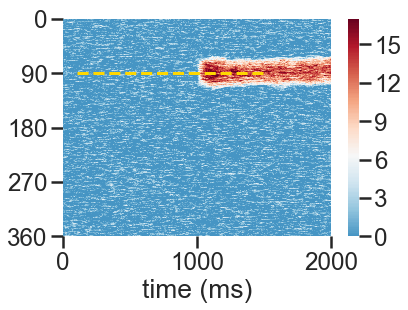

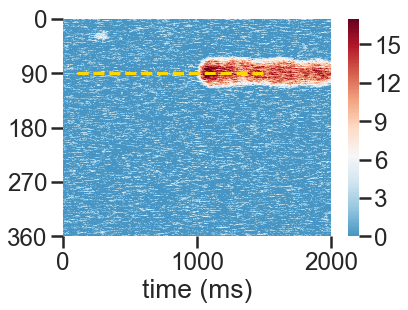

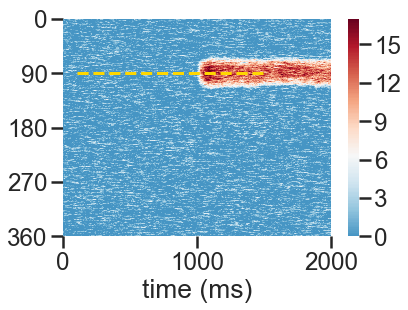

In [96]:
fee=0.94
fei=0.92
fie=1.14
fii=1.08

n_sim_ph=10
firing_phant_on=[]
firing_all_on =[]
RE_on=[]
RE_on_stim=[]

for g in range(n_sim_ph):
    on2= model(totalTime=2000, targ_onset_1=5000, targ_onset_2=1000, angle_target_i=90, presentation_period=100,
               angle_separation=0, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fei,
               GEI=0.13*fie,
               GIE=0.042*fii, 
               sigE=7., sigI=5.,            
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=100, phnatom_duration=200)
    hemap(on2)
    plt.show()
    RE_on.append(on2[4][:, 50:400])
    RE_on_stim.append(on2[4][:, 500:])
    mean_firing=on2[4][:, 50:500].mean()
    firing_phant_on.append(mean_firing)
    firing_all_on.append( on2[4].mean(axis=0) )

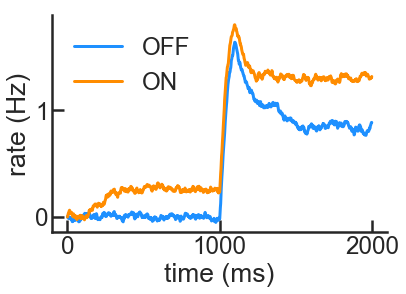

In [97]:
plt.plot(np.mean(firing_all_off, axis=0), label='OFF', color=c_off )
plt.plot(np.mean(firing_all_on, axis=0), label='ON', color=c_on )
plt.legend(frameon=False)
plt.title('')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.gca().set_xticks([0, 500, 1000])
plt.gca().set_xticklabels(['0', '1000', '2000'], rotation=0)
plt.ylabel('rate (Hz)')
plt.xlabel('time (ms)');
#r'abs error ($^\circ$)'
#plt.ylim(-2,17);

In [103]:
ph_on=pd.DataFrame(firing_phant_on)
ph_on['stimulation']='ON'
ph_off=pd.DataFrame(firing_phant_off)
ph_off['stimulation']='OFF'

In [104]:
df_ph = pd.concat([ph_on, ph_off])
df_ph.columns=['mean_firing', 'stimulation']
df_ph['order']='2nd'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


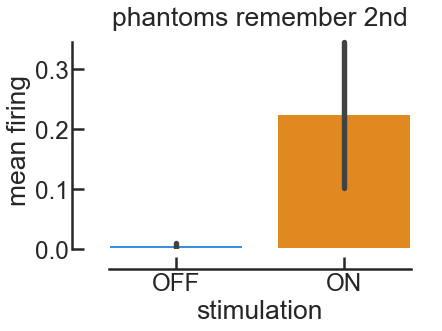

In [106]:
sns.barplot(x='stimulation', y='mean_firing', order=['OFF', 'ON'], 
            palette = offon_pal, ci=69, data=df_ph)
plt.ylabel(r'mean firing')
plt.title('phantoms remember 2nd')
#plt.ylim(-0.05,0.3)
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend(loc='best', frameon=False, prop={'size': 16});
plt.show()

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


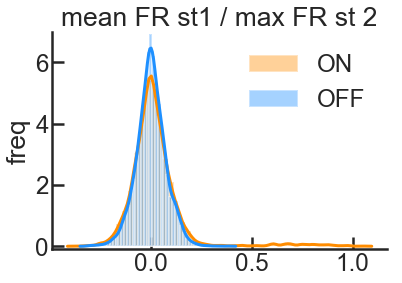

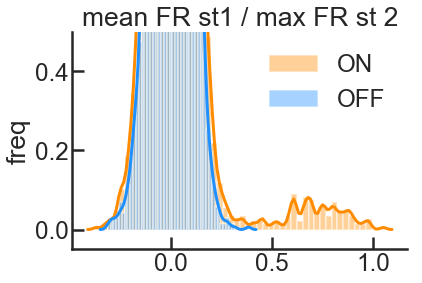

In [107]:
off=[] ## no stimulation

for i in range(len(RE_off)):
    off.append(RE_off[i].mean(axis=1) / RE_off_stim[i].max(axis=1)) #.max(axis=1)
    
    
off = list(itertools.chain.from_iterable(off))


on=[] ## stimulation

for i in range(len(RE_on)):
    on.append(RE_on[i].mean(axis=1) / RE_on_stim[i].max(axis=1)) #.max(axis=1)
    
    
on = list(itertools.chain.from_iterable(on))

sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
plt.ylim(-0.1, 7. )
plt.title('mean FR st1 / max FR st 2')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()


sns.distplot(on, color=c_on, label='ON')
sns.distplot(off, color=c_off, label='OFF')
plt.ylim(-0.05, 0.5 );
plt.title('mean FR st1 / max FR st 2')
plt.gca().spines['right'].set_visible(False)  ## aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
#plt.gca().set_xticks([0,N/2, N])
plt.ylabel('freq')
plt.xlabel('');
plt.legend(frameon=False)
plt.show()
#plt.xlim(-1000,1000)